<table>
 <tr align=left><td><img align=left src="./images/CC-BY.png">
 <td>Text provided under a Creative Commons Attribution license, CC-BY. All code is made available under the FSF-approved MIT license. (c) Kyle T. Mandli</td>
</table>

In [1]:
%matplotlib notebook
from __future__ import print_function
import numpy
import matplotlib.pyplot as plt

# Interpolation

**Definition:**  Given a discrete set of values $y_i$ at locations $x_i$, an *interpolant* is a (piece-wise) continuous function $f(x)$ that passes exactly through the data (*i.e.* $f(x_i) = y_i$).

## Applications

 - Data filling
 - Function approximation
 - Fundamental component of other algorithms
   - Root finding (secant method)
   - Optimization, minima/maxima (successive parabolic interpolation)
   - Numerical integration and differentiation
   

## Polynomial Interpolation

**Theorem:**  There is a *unique* polynomial of degree $N$, $\mathcal{P}_N(x)$, that passes exactly through $N + 1$ values $y_1, y_2, \ldots, y_N, y_{N+1}$ at *distinct* points $x_1, x_2, \ldots, x_N, x_{N+1}$.

Consequence of the number of unknowns in $\mathcal{P}_N(x)$.

#### Example 1: 2 Points

Given points are $(x_0, y_0)$ and $(x_1, y_1)$ which will lead to a line:

Define $P_1(x) = p_1 x + p_0$ and use the two points to find $p_0$ and $p_1$:

$$y_0 = p_1 x_0 + p_0 ~~~~ \Rightarrow ~~~~ p_0 = y_0 - p_1 x_0$$

$$\begin{aligned}
    y_1 &= p_1 x_1 + p_0 & \Rightarrow \\
    y_1 &= p_1 x_1 + y_0 - p_1 x_0 & \Rightarrow \\
    p_1 &= \frac{y_1 - y_0}{x_1 - x_0} & \Rightarrow \\
    p_0 &= y_0 - \frac{y_1 - y_0}{x_1 - x_0} x_0 &
\end{aligned}$$

$$\mathcal{P}_1(x) = \frac{y_1 - y_0}{x_1 - x_0} x + y_0 - \frac{y_1 - y_0}{x_1 - x_0} x_0 = \frac{y_1 - y_0}{x_1 - x_0} (x - x_0) + y_0$$

#### Example 2:  3 Points

Given points are $(x_0, y_0)$, $(x_1, y_1)$, and $(x_2, y_2)$ which will lead to quadratic polynomial:

Define $\mathcal{P}_2(x) = p_0 x^2 + p_1 x + p_2$ leading to the equations

$$y_0 = p_2 x_0^2 + p_1 x_0 + p_0$$

$$y_1 = p_2 x_1^2 + p_1 x_1 + p_0$$

$$y_2 = p_2 x_2^2 + p_1 x_2 + p_0$$

This gets complicated quickly!

### Proof - Uniqueness of Polynomial Interpolants

Let 

$$\mathcal{P}_N(x) = \sum^N_{n=0} p_n x^n $$
or
$$\mathcal{P}_N(x) = p_0 + p_1 x + \cdots + p_{N - 1} x^{N - 1} + p_{N} x^N$$

and require $\mathcal{P}_N(x_i) = y_i$ for $i=0,1,\ldots,N$ and $x_i \neq x_j ~~~ \forall i,j$.

Assume there exists another polynomial 

$$Q_N(x) = \sum^N_{n=0} q_n x^n$$

that passes through the same set of points such that $Q_N(x_i) = y_i$.  Now compute $T_N(x) = \mathcal{P}_N(x) - Q_N(x)$:

We know that by assumption that $T_N(x_i) = 0$ but what about for all $x$?

$$T_N(x) = \mathcal{P}_N(x) - Q_N(x) = \sum^N_{n=0} p_n x^n - q_n x^n = \sum^N_{n=0} (p_n - q_n) x^n$$

But if $T_N(x_i) = 0$ implies that $p_n - q_n = 0$ individually and therefore $\mathcal{P}_N(x) = Q_N(x)$.

### Monomial Basis

Let $\mathcal{P}_N(x) = \sum^N_{n=0} p_n x^n$, $\mathcal{P}_N(x)$ can be represented by a *linear combination* of the monomials

$$1, x, x^2, x^3, \ldots, x^{N-1}, x^N$$ 

with weights 

$$p_0, p_1, p_2, p_3, \ldots, p_{N-1}, \text{and } p_N$$

respectively.

#### Example 3:  Monomial Basis

Consider $\mathcal{P}_3(x) = p_0 + p_1 x + p_2 x^2 + p_3 x^3$ with the four data points $(x_i, y_i), ~~ i = 0,1,2,3$.  We have four equations and four unknowns as expected:

$$\mathcal{P}_3(x_0) = p_0 + p_1 x_0 + p_2 x_0^2 + p_3 x_0^3 = y_0$$

$$\mathcal{P}_3(x_1) = p_0 + p_1 x_1 + p_2 x_1^2 + p_3 x_1^3 = y_1$$

$$\mathcal{P}_3(x_2) = p_0 + p_1 x_2 + p_2 x_2^2 + p_3 x_2^3 = y_2$$

$$\mathcal{P}_3(x_3) = p_0 + p_1 x_3 + p_2 x_3^2 + p_3 x_3^3 = y_3$$

Lets rewrite these as a matrix equation:

$$\vec{x} = \begin{bmatrix} x_0 \\ x_1 \\ x_2 \\ x_3 \end{bmatrix} \quad \vec{y} = \begin{bmatrix} y_0 \\ y_1 \\ y_2 \\ y_3 \end{bmatrix} \quad \vec{p} = \begin{bmatrix} p_0 \\ p_1 \\ p_2 \\ p_3 \end{bmatrix}$$

Define the *Vandermonde* matrix as

$$
V = \begin{bmatrix} 
     1 & x_0 & x_0^2 & x_0^3 \\
     1 & x_1 & x_1^2 & x_1^3 \\
     1 & x_2 & x_2^2 & x_2^3 \\
     1 & x_3 & x_3^2 & x_3^3
\end{bmatrix}
$$

which allows us to write the system of linear equations as $V \vec{p} = \vec{y}$:

$$\begin{bmatrix} 
     1 & x_0 & x_0^2 & x_0^3 \\
     1 & x_1 & x_1^2 & x_1^3 \\
     1 & x_2 & x_2^2 & x_2^3 \\
     1 & x_3 & x_3^2 & x_3^3
\end{bmatrix} \begin{bmatrix} p_0 \\ p_1 \\ p_2 \\ p_3 \end{bmatrix} = \begin{bmatrix} y_0 \\ y_1 \\ y_2 \\ y_3 \end{bmatrix}$$

$$\begin{bmatrix} 
     1 & x_0 & x_0^2 & x_0^3 \\
     1 & x_1 & x_1^2 & x_1^3 \\
     1 & x_2 & x_2^2 & x_2^3 \\
     1 & x_3 & x_3^2 & x_3^3
\end{bmatrix} \begin{bmatrix} p_0 \\ p_1 \\ p_2 \\ p_3 \end{bmatrix} = \begin{bmatrix} y_0 \\ y_1 \\ y_2 \\ y_3 \end{bmatrix}$$

- What happens if we have redundant data?  Either $(x_i, y_i)$ is repeated or for one $i$ we have two values of $y$.
- What if we have more points then the order of polynomial we want?
- How does this relate to solving the above linear system of equations?

Vandermonde matrices in general are defined as

$$V = \begin{bmatrix} 
    1      & x_0    & x_0^2  & \cdots & x_0^N  \\
    1      & x_1    & x_1^2  & \cdots & x_1^N  \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    1      & x_m    & x_m^2  & \cdots & x_m^N  \\
\end{bmatrix}
$$

where $V$ is a $m \times n$ matrix with points $(x_i, y_i)$ for $i = 0, 1, 2, 3, \ldots m$ and for an order $N$ polynomial $\mathcal{P}_N(x)$.

### Finding $p_i$

Finding the coefficients of $\mathcal{P}_N(x)$ can be done by solving the system outlined above.  There are functions in `numpy` that can do this for us such as:
 - `numpy.polyfit(x, y, x.shape[0] - 1)`
 - `numpy.vander(x, N=None)` to construct the matrix and use a linear solver routine.

We can also use a different basis that might be easier to use.

### Lagrangian Basis

Given $N+1$ points $(x_0,y_0), (x_1,y_1), \ldots, (x_{N},y_{N})$ again assuming the $x_i$ are all unique, the interpolating polynomial $\mathcal{P}_N(x)$ can be written as

$$\mathcal{P}_N(x) = \sum^{N}_{i=0} y_i \ell_i(x)$$

where 

$$\ell_i(x) = \prod^{N}_{j=0, j \neq i} \frac{x - x_j}{x_i - x_j} = \frac{x - x_0}{x_i - x_0} \frac{x - x_1}{x_i - x_1} \cdots \frac{x - x_{i-1}}{x_i - x_{i-1}}\frac{x - x_{i+1}}{x_i - x_{i+1}} \cdots \frac{x - x_{N}}{x_i - x_{N}}$$

Note that $\ell_i(x_i) = 1$ and $\forall j\neq i, ~~ \ell_i(x_j) = 0$.

#### Example 4:  $N = 1$ Lagrange Polynomial

Given 2 points $(x_0, y_0)$ and $(x_1, y_1)$ the Lagrange form of $\mathcal{P}_N(x)$ is given by

$$\ell_0(x) = \frac{x - x_1}{x_0 - x_1}$$

and

$$\ell_1(x) = \frac{x - x_0}{x_1 - x_0}$$

so that

$$\mathcal{P}_1(x) = \ell_0(x) \cdot y_0 + \ell_1(x) \cdot y_1 = \frac{x - x_1}{x_0 - x_1} \cdot y_0 + \frac{x - x_0}{x_1 - x_0} \cdot y_1$$

One important aspect of Lagrange polynomials to note is that the $\ell_i(x)$ functions are exactly 1 when $x  = x_i$ and that every other $\ell_j(x)$ where $j \neq i$ is 0.

<IPython.core.display.Javascript object>


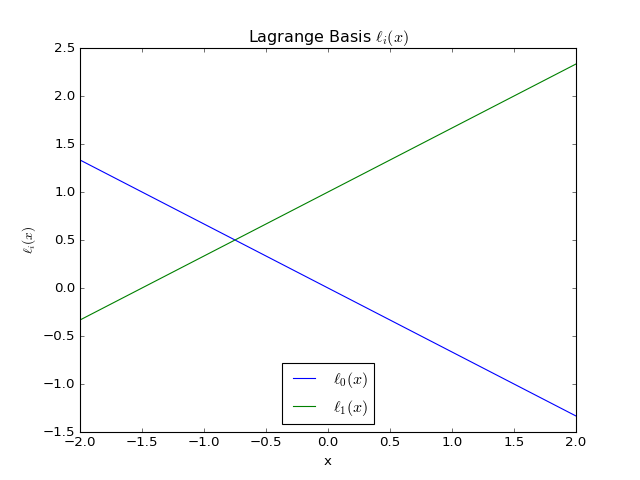

<IPython.core.display.Javascript object>


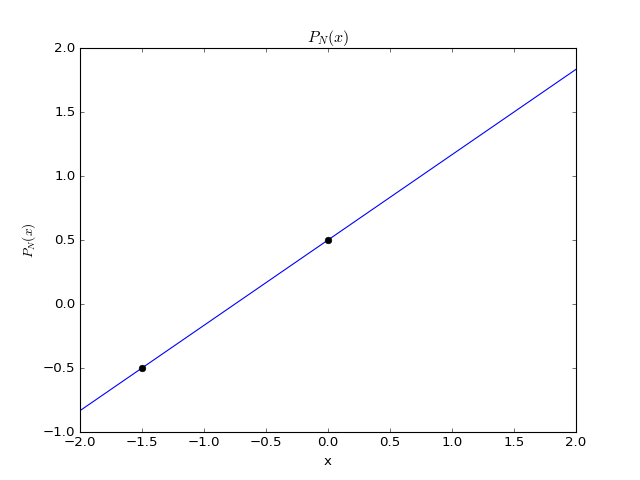

In [2]:
data = numpy.array([[-1.5, -0.5], [0.0, 0.5]])
N = data.shape[0] - 1
M = data.shape[0]
x = numpy.linspace(-2.0, 2.0, 100)

# ====================================================
# Compute the Lagrange basis (\ell_i(x))
def lagrange_basis(x, data):
    """Compute Lagrange basis at x given data"""
    basis = numpy.ones((data.shape[0], x.shape[0]))
    for i in range(data.shape[0]):
        for j in range(data.shape[0]):
            if i != j:
                basis[i, :] *= (x - data[j, 0]) / (data[i, 0] - data[j, 0])
    return basis

# ====================================================
# Calculate full polynomial
def poly_interpolant(x, data):
    """Compute polynomial interpolant of (x,y) using Lagrange basis"""
    P = numpy.zeros(x.shape[0])
    basis = lagrange_basis(x, data)
    for n in range(data.shape[0]):
        P += basis[n, :] * data[n, 1]
    return P

# ====================================================
# Plot individual basis functions
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
basis = lagrange_basis(x, data)
for i in range(N + 1):
    axes.plot(x, basis[i, :], label="$\ell_{%s}(x)$" % i)

axes.set_title("Lagrange Basis $\ell_i(x)$")
axes.set_xlabel("x")
axes.set_ylabel("$\ell_i(x)$")
axes.legend(loc=8)

# Plot full polynomial P_N(x)
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(x, poly_interpolant(x, data), label="$P_{%s}(x)$" % N)
for point in data:
    axes.plot(point[0], point[1], 'ko')
axes.set_title("$P_N(x)$")
axes.set_xlabel("x")
axes.set_ylabel("$P_N(x)$")
    
plt.show()

#### Example 5:  Interpolate six points from $sin(\pi x)$

Use six points to approximate $\sin$ on the interval $x \in [-1, 1]$.  What is the behavior as $N \rightarrow \infty$?  Also plot the error between $f(x)$ and the interpolant $P_N(x)$.

<IPython.core.display.Javascript object>


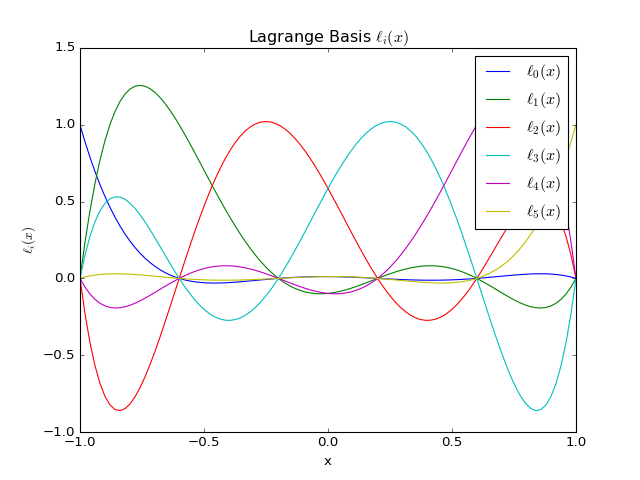

<IPython.core.display.Javascript object>


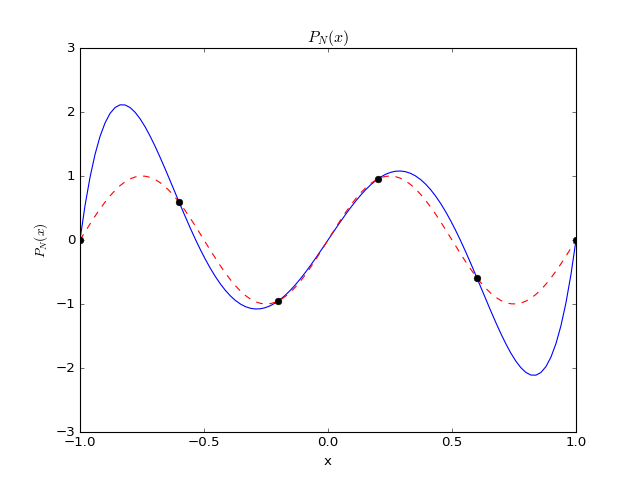

In [4]:
num_points = 6
data = numpy.empty((num_points, 2))
data[:, 0] = numpy.linspace(-1, 1, num_points)
data[:, 1] = numpy.sin(2.0 * numpy.pi * data[:, 0])
N = data.shape[0] - 1 # Degree of polynomial
M = data.shape[0]
x = numpy.linspace(-1.0, 1.0, 100)

# ====================================================
# Plot individual basis functions
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
basis = lagrange_basis(x, data)
for i in range(N + 1):
    axes.plot(x, basis[i, :], label="$\ell_{%s}(x)$" % i)

axes.set_title("Lagrange Basis $\ell_i(x)$")
axes.set_xlabel("x")
axes.set_ylabel("$\ell_i(x)$")
axes.legend(loc=1)

# Plot full polynomial P_N(x)
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(x, poly_interpolant(x, data), label="$P_{%s}(x)$" % N)
axes.plot(x, numpy.sin(2.0 * numpy.pi * x), 'r--', label="True $f(x)$")
for point in data:
    axes.plot(point[0], point[1], 'ko')
axes.set_title("$P_N(x)$")
axes.set_xlabel("x")
axes.set_ylabel("$P_N(x)$")
    
plt.show()

#### Example 6: Runge's Function

Interpolate $f(x) = \frac{1}{1 + 25 x^2}$ using 6 points of your choosing on $x \in [-1, 1]$.

Try it with 11 points.

Keep increasing the number of points and see what happens.

<IPython.core.display.Javascript object>


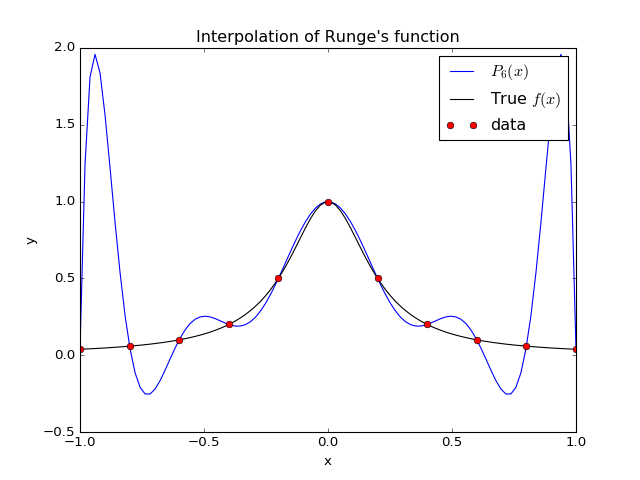

In [8]:
def f(x):
    return 1.0 / (1.0 + 25.0 * x**2)

x = numpy.linspace(-1, 1, 100)

num_points = 11
data = numpy.empty((num_points, 2))
data[:, 0] = numpy.linspace(-1, 1, num_points)
data[:, 1] = f(data[:, 0])
N = data.shape[0] - 1
    
# Plot the results
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

axes.plot(x, poly_interpolant(x, data), 'b', label="$P_6(x)$")
axes.plot(x, f(x), 'k', label="True $f(x)$")
axes.plot(data[:, 0], data[:, 1], 'ro', label="data")
          
axes.set_title("Interpolation of Runge's function")
axes.set_xlabel("x")
axes.set_ylabel("y")
axes.legend(loc=1)

plt.show()

### Rules of Thumb

 - Avoid high-order interpolants when possible!  Keep increasing the number of points and see what happens.
 - Avoid extrapolation - Increase the range of $x$ in the above example and check how good the approximation is beyond our sampling interval

### Error Analysis

**Theorem:** Lagrange Remainder Theorem - Let $f(x) \in C^{N+1}[-1, 1]$, then
$$
    f(x) = \mathcal{P}_N(x) + R_N(x)
$$
where $\mathcal{P}_N(x)$ is the interpolating polynomial and
$$
    R_N(x) = Q(x) \frac{f^{(N+1)}(c)}{(N+1)!} \quad \text{with} \quad c \in [-1,1]
$$
with
$$
    Q(x) = \prod^N_{i=0} (x - x_i) = (x-x_0)(x-x_1)\cdots(x-x_N) .
$$

A few things to note:
 - For Taylor's theorem note that $Q(x) = (x - x_0)^{N+1}$ and the error only vanishes at $x_0$.
 - For Lagrange's theorem the error vanishes at all $x_i$.
 - To minimize $R_N(x)$ requires minimizing $|Q(x)|$ for $x \in [-1, 1]$.

#### Minimizing $R_N(x)$

Minimizing the error $R_N(x)$ in Lagrange's theorem is equivalent to minimizing $|Q(x)|$ for $x \in [-1, 1]$.

Minimizing error $\Leftrightarrow$ picking roots of $Q(x)$ or picking the points where the interpolant data is located.  How do we this?

### Chebyshev Polynomials

*Chebyshev polynomials* $T_N(x)$ are another basis that can be used for interpolation.

First 5 polynomials
$$T_0(x) = 1$$

$$T_1(x) = x$$

$$T_2(x) = 2 x^2 - 1$$

$$T_3(x) = 4 x^3 - 3 x$$

$$T_4(x) = 8x^4 - 8x^2 + 1$$

In [ ]:
def cheb_poly(x, N):
    """Compute the *N*th Chebyshev polynomial and evaluate it at *x*"""
    T = numpy.empty((3, x.shape[0]))
    T[0, :] = numpy.ones(x.shape)
    T[1, :] = x
    if N == 0:
        return T[0, :]
    elif N == 1:
        return T[1, :]
    else:
        for k in range(2, N + 1):
            T[2, :] = 2.0 * x * T[1, :] - T[0, :]
            T[0, :] = T[1, :]
            T[1, :] = T[2, :]
    
        return T[2, :]

x = numpy.linspace(-1, 1, 100)

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

for n in range(5):
    axes.plot(x, cheb_poly(x, n), label="$T_%s$" % n)

axes.set_ylim((-1.1, 1.1))
axes.set_title("Chebyshev Polynomials")
axes.set_xlabel("x")
axes.set_ylabel("$T_N(x)$")
axes.legend(loc=1)

plt.show()

1. Chebyshev nodes of the 1st kind (roots)
$$
    x_k = \cos \left (\frac{(2 k - 1) \pi}{2 N} \right ) \quad k = 1, \ldots, N
$$
1. Chebyshev nodes of the 2nd kind (extrema)
$$
    x_k = \cos \left( \frac{k \pi}{N} \right) \quad k = 0, \ldots, N
$$



In [ ]:
N = 5
x_extrema = numpy.cos(numpy.arange(N + 1) * numpy.pi / N)
x_nodes = numpy.cos((2.0 * numpy.arange(1, N + 1) - 1.0) / (2.0 * N) * numpy.pi)

fig = plt.figure()
# fig.set_figwidth(fig.get_figwidth() * 2)
axes = fig.add_subplot(1, 1, 1)

# Plot points
axes.plot(x_extrema, numpy.zeros(N+1), 'ro')
axes.plot(x_nodes, numpy.zeros(N), 'bo')
    
# Plot some helpful lines
axes.plot((-1.0, -1.0), (-1.1, 1.1), 'k--')
axes.plot((1.0, 1.0), (-1.1, 1.1), 'k--')
axes.plot((-1.0, 1.0), (0.0, 0.0), 'k--')
for i in range(x_extrema.shape[0]):
    axes.plot((x_extrema[i], x_extrema[i]), (-1.1, 1.1), 'r--')
    axes.plot(x_extrema[i], cheb_poly(x_extrema, N)[i], 'ro')

print(x_extrema)
print(numpy.cos(x_extrema))
    
# Plot Chebyshev polynomial
x_hat = numpy.linspace(-1, 1, 1000)
axes.plot(x_hat, cheb_poly(x_hat, N), 'k')
axes.set_xlim((-1.1, 1.1))
axes.set_ylim((-1.1, 1.1))

# Labels
axes.set_title("Chebyshev Nodes and Extrema", fontsize="20")
axes.set_xlabel("x", fontsize="15")
axes.set_ylabel("$T_{N+1}(x)$", fontsize="15")

plt.show()

In [ ]:
# First-kind Nesting (3 x)
fig = plt.figure()
# fig.set_figwidth(fig.get_figwidth() * 2)
axes = fig.add_subplot(1, 1, 1)

N = 5
factor = 3
x_1 = numpy.cos((2.0 * numpy.arange(1, N + 1) - 1.0) / (2.0 * N) * numpy.pi)
x_2 = numpy.cos((2.0 * numpy.arange(1, factor * N + 1) - 1.0) / (2.0 * factor * N) * numpy.pi)

axes.plot(x_1, numpy.zeros(N), "o", color="r", markerfacecolor="lightgray", markersize="15")
axes.plot(x_2, numpy.zeros(N * factor), 'kx', markersize="10")

x_hat = numpy.linspace(-1, 1, 1000)
axes.plot(x_hat, cheb_poly(x_hat, N), 'k')
axes.plot(x_hat, cheb_poly(x_hat, factor * N), 'k')
axes.set_xlim((-1.1, 1.1))
axes.set_ylim((-1.1, 1.1))
axes.set_title("Nesting of 1st and 2nd Kind Chebyshev Polynomials")
axes.set_xlabel("$x$")
axes.set_ylabel("$T_N(x)$")

#### Properties:
1. Defined by a recurrence relation 

   $$T_k(x) = 2 x T_{k-1}(x) - T_{k-2}(x)$$
   
1. Leading coefficient of $x^N$ in $T_N(x)$ is $2^{N-1}$ for $N \geq 1$
1. Extreme values:

   $$|T_N(x)| \leq 1 \quad \text{for} \quad  -1 \leq x \leq 1$$
   
1. Minimax principle:  The polynomial

   $$T(x) = \frac{T_{N+1}(x)}{2^N}$$
   
   is a monic polynomial with the property that
   
   $$\max |T(x)| \leq \max |Q(X)| \quad \text{for} \quad  x \in [-1, 1], \quad \text{and}$$
   
   $$\max |T(x)| = \frac{1}{2^N}$$

#### Error Analysis Redux

Given that the Chebyshev polynomials are a minimum on the interval $[-1, 1]$ we would like $T(x) = Q(x)$.  

Since we only know the roots of $Q(x)$ (the points where the interpolant data is located) we require these points to be the roots of the Chebyshev polynomial $T_{N+1}(x)$ therefore enforcing $T(x) = Q(x)$.

The zeros of $T_N(x)$ in the interval $[-1, 1]$ can be shown to satisfy
$$
    x_k = \cos\left( \frac{(2k - 1) \pi}{2 N} \right ) \quad \text{for} \quad k=1, \ldots, N
$$
These nodal points (sampling the function at these points) can be shown to minimize interpolation error.

In [ ]:
x = numpy.linspace(0, numpy.pi, 100)
N = 15

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1, aspect="equal")

axes.plot(numpy.cos(x), numpy.sin(x), 'r--')
axes.plot(numpy.linspace(-1.1, 1.1, 100), numpy.zeros(x.shape), 'r')
for k in range(1, N + 1):
    location = [numpy.cos((2.0 * k - 1.0) * numpy.pi / (2.0 * N)),
                numpy.sin((2.0 * k - 1.0) * numpy.pi / (2.0 * N))]
    axes.plot(location[0], location[1], 'ko')
    axes.plot(location[0], 0.0, 'ko')
    axes.plot([location[0], location[0]], [0.0, location[1]], 'k--')
    
axes.set_xlim((-1.1, 1.1))
axes.set_ylim((-0.1, 1.1))
plt.show()

#### Summary

1. Minimizing the error in Lagrange's theorem is equivalent to minimizing 
$$
    |Q(x)| \quad \text{for} \quad x \in [-1, 1].
$$
1. We know Chebyshev polynomials are a minimum on the interval $[-1, 1]$ so we would like to have $T(x) = Q(x)$.
1. Since we only know the roots of $Q(x)$ (the points where the interpolant data is located) we require these points to be the roots of the Chebyshev polynomial $T_{N+1}(x)$ therefore enforcing $T(x) = Q(x)$.
1. The zeros of $T_N(x)$ in the interval $[-1, 1]$ can be shown to satisfy
$$
    x_k = \cos\left( \frac{(2k - 1) \pi}{2 N} \right ) \quad \text{for} \quad k=1, \ldots, N
$$
These nodal points (sampling the function at these points) can be shown to minimize interpolation error.

#### Notes
 - The Chebyshev nodes minimize interpolation error for any polynomial basis (due to uniqueness any polynomial that these points are identical regardless of the basis).
 - Chebyshev nodes uniquely define the Chebyshev polynomials.
 - The boundedness properties of Chebyshev polynomials are what lead us to the roots as a minimization but there are other used for these orthogonal polynomials.
 - There are two kinds of Chebyshev nodes and therefore two definitions.

In [ ]:
def f(x):
    return 1.0 / (1.0 + 25.0 * x**2)

# Parameters
x = numpy.linspace(-1, 1, 100)
num_points = 25

# ============================================================
#  Equidistant nodes
equidistant_data = numpy.empty((num_points, 2))
equidistant_data[:, 0] = numpy.linspace(-1, 1, num_points)
equidistant_data[:, 1] = f(equidistant_data[:, 0])
N = equidistant_data.shape[0] - 1

P_lagrange = poly_interpolant(x, equidistant_data)

# ============================================================
#  Chebyshev nodes
chebyshev_data = numpy.empty((num_points, 2))
chebyshev_data[:, 0] = numpy.cos((2.0 * numpy.arange(1, num_points + 1) - 1.0) * numpy.pi / (2.0 * num_points))
chebyshev_data[:, 1] = f(chebyshev_data[:, 0])

P_cheby1 = poly_interpolant(x, chebyshev_data)
    
# Fit directly with Chebyshev polynomials
coeff = numpy.polynomial.chebyshev.chebfit(chebyshev_data[:, 0], chebyshev_data[:, 1], N)
P_cheby2 = numpy.polynomial.chebyshev.chebval(x, coeff)

# Check on unique polynomials
print(numpy.allclose(P_cheby1, P_cheby2))

# ============================================================
# Plot the results
fig = plt.figure()
fig.subplots_adjust(hspace=.5)

axes = fig.add_subplot(2, 1, 1)
axes.plot(x, P_lagrange, 'b', label="$P_%s(x)$" % N)
axes.plot(x, f(x), 'k', label="True $f(x)$")
axes.plot(equidistant_data[:, 0], equidistant_data[:, 1], 'ro', label="data")
axes.set_title("Interpolation of Runge's function at Equispaced Points")
axes.set_xlabel("x")
axes.set_ylabel("y")
axes.legend(loc=8)
print(numpy.linalg.norm(P_lagrange - f(x)))

axes = fig.add_subplot(2, 1, 2)
axes.plot(x, f(x), 'k', label="True $f(x)$")
axes.plot(x, P_cheby1, 'b', label="$P_%s(x)$" % N)
axes.plot(chebyshev_data[:, 0], chebyshev_data[:, 1], 'ro', label="data")
          
axes.set_title("Interpolation of Runge's function at Chebyshev Points")
axes.set_xlabel("x")
axes.set_ylabel("y")
axes.legend(loc=1)
print(numpy.linalg.norm(P_cheby1 - f(x)))


plt.show()

## Piece-Wise Polynomial Interpolation

Given $N$ points, use lower order polynomial interpolation to fit the function in pieces.  We can choose the order of the polynomials and the continuity.

 - $C^0$: Interpolant is continuous
   - Linear interpolation
   - Quadratic interpolation
 - $C^1$: Interpolation and 1st derivative are continuous
   - Cubic Hermite polynomials (PCHiP)
 - $C^2$: Interpolation, 1st and 2nd derivatives are continuous 
   - Cubic splines

### Piece-Wise Linear

Given a segment between point $(x_k, y_k)$a nd $(x_{k+1}, y_{k+1})$ define the segment as

$$\mathcal{P}_k(x) = \frac{y_{k+1} - y_k}{x_{k+1} - x_k} (x - x_k) + y_k$$

The final interpolant $\mathcal{P}(x)$ is then defined on $[x_k, x_{k+1}]$ using this function.

In [ ]:
data = numpy.array([[1.0, 3.0], [2.0, 1.0], [3.5, 4.0], [5.0, 0.0], [6.0, 0.5], [9.0, -2.0], [9.5, -3.0]])
x = numpy.linspace(0.0, 10, 100)
N = data.shape[0] - 1

# Lagrange Basis
P_lagrange = poly_interpolant(x, data)

# C^0 Piece-wise linear
# P_pw_linear = numpy.interp(x, data[:, 0], data[:, 1])
P_linear = numpy.zeros(x.shape)
for n in range(1, N + 1):
    P_linear += ((data[n, 1] - data[n - 1, 1]) / (data[n, 0] - data[n - 1, 0]) * (x - data[n - 1, 0]) 
                         + data[n - 1, 1]) * (x > data[n - 1, 0]) * (x <= data[n, 0])
# Add end points for continuity
P_linear += numpy.ones(x.shape) * data[0, 1] * (x < data[0, 0])
P_linear += numpy.ones(x.shape) * data[-1, 1] * (x >= data[-1, 0])

# Plot
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

axes.plot(data[:,0], data[:,1], 'ko')
axes.plot(x, P_lagrange, 'b--')
axes.plot(x, P_linear, 'r')

axes.set_title("Interpolated Data - $C^0$ Linear")
axes.set_xlabel("x")
axes.set_ylabel("$P_1(x)$")
axes.set_xlim([0.0, 10.0])
axes.set_ylim([-4.0, 15.0])

plt.show()

### Piece-Wise Overlapping Polynomials

In sets of three points $(x_{k+1}, y_{k+1})$, $(x_{k}, y_{k})$, and $(x_{k-1}, y_{k-1})$, find quadratic interpolant and define final interpolant $P(x)$ using the quadratic interpolant $\mathcal{P}_k(x)$ on $[x_{k-1}, x_{k+1}]$.

In [ ]:
data = numpy.array([[1.0, 3.0], [2.0, 1.0], [3.5, 4.0], [5.0, 0.0], [6.0, 0.5], [9.0, -2.0], [9.5, -3.0]])
x = numpy.linspace(0.0, 10, 100)
N = data.shape[0] - 1

# C^0 Piece-wise quadratic
P_quadratic = numpy.zeros(x.shape)
for k in range(1, N + 1, 2):
    p = numpy.polyfit(data[k - 1:k + 2, 0], data[k - 1:k + 2, 1], 2)
    P_quadratic += numpy.polyval(p, x) * (x > data[k - 1, 0]) * (x <= data[k + 1, 0])
# Add end points for continuity
P_quadratic += numpy.ones(x.shape) * data[0, 1] * (x < data[0, 0])
P_quadratic += numpy.ones(x.shape) * data[-1, 1] * (x >= data[-1, 0])
    
# Plot
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

axes.plot(data[:,0], data[:,1], 'ko')
axes.plot(x, P_lagrange, 'b--')
axes.plot(x, P_quadratic, 'r')

axes.set_title("Interpolated Data - $C^0$ Quadratic")
axes.set_xlabel("x")
axes.set_ylabel("$P_3(x)$")
axes.set_xlim([0.0, 10.0])
axes.set_ylim([-4.0, 15.0])

plt.show()

### Piece-Wise $C^1$ Cubic Interpolation

For the previous two cases we had discontinous 1st derivatives!  We can make this better by constraining the polynomials to be continuous at the boundaries of the piece-wise intervals.

Given a segment between points $(x_k, y_k)$ and $(x_{k+1}, y_{k+1})$ we want to fit a cubic function between the two points.

$$\mathcal{P}_k(x) = p_0 + p_1 x + p_2 x^2 + p_3 x^3$$

$$\mathcal{P}_k(x_k) = y_k, \quad \mathcal{P}_k(x_{k+1}) = y_{k+1}$$

Now we have 4 unknowns but only two data points!  Constraining the derivative at each interval end will lead to two new equations and therefore we can solve for the interpolant.

$$\frac{\text{d}}{\text{dx}} \mathcal{P}_k(x_k) = d_k, \quad \frac{\text{d}}{\text{dx}} \mathcal{P}_k(x_{k+1}) = d_{k+1}$$

where we need to prescribe the $d_k$s.  Since we know the polynomial we can write these 4 equations as

$$\begin{aligned}
p_0 + p_1 x_k + p_2 x_k^2 + p_3 x_k^3 &= y_k \\
p_0 + p_1 x_{k+1} + p_2 x_{k+1}^2 + p_3 x_{k+1}^3 &= y_{k+1} \\
p_1 +  2p_2 x_k + 3 p_3 x_k^2 &= d_k \\
p_1 + 2 p_2 x_{k+1} + 3 p_3 x_{k+1}^2 &= d_{k+1}
\end{aligned}$$

Rewriting this as a system we get
$$\begin{bmatrix}
    1 & x_k & x_k^2 & x_k^3 \\
    1 & x_{k+1} & x_{k+1}^2 & x_{k+1}^3 \\
    0 & 1 & 2 x_k & 3 x_k^2 \\
    0 & 1 & 2 x_{k+1} & 3 x_{k+1}^2
\end{bmatrix} \begin{bmatrix}
p_0 \\ p_1 \\ p_2 \\ p_3
\end{bmatrix} = \begin{bmatrix}
y_k \\ y_{k+1} \\ d_k \\ d_{k+1}
\end{bmatrix}$$

A common simplification to the problem description re-parameterizes the locations of the points such that $s \in [0, 1]$ and recast the problem with $(0, y_k)$ and $(1, y_{k+1})$.  This simplifies the above system to
$$\begin{bmatrix}
    1 & 0 & 0 & 0 \\
    1 & 1 & 1 & 1 \\
    0 & 1 & 0 & 0 \\
    0 & 1 & 2 & 3
\end{bmatrix} \begin{bmatrix}
p_0 \\ p_1 \\ p_2 \\ p_3
\end{bmatrix} = \begin{bmatrix}
y_k \\ y_{k+1} \\ d_k \\ d_{k+1}
\end{bmatrix}$$

which can be solved to find

$$\begin{aligned}
\mathcal{P}(s) &= (1-s)^2 (1 + 2s) y_k + s^2 (3 - 2 s) y_{k+1} + s (1 - s)^2 d_k - s^2 (1 - s)d_{k+1}\\
\mathcal{P}'(s) &= 6s(s-1) y_k + 6s(1-s) y_{k+1} + (s-1)(3s-1) d_k - s(3s-2) d_{k+1}\\
\mathcal{P}''(s) &= 6 (1-2s)(y_{k+1} - y_k) + (6s - 4) d_k + (6s-2) d_{k+1}
\end{aligned}$$

Now, how to choose $d_k$?

#### PCHIP

Piecewise Cubic Hermite Interpolation Polynomial

 - Picks the slope that preserves monotonicity
 - Also tried to preserve the shape of the data
 - Note that in general this interpolant is $\mathcal{P}_k(x) \in C^1$

In [ ]:
import scipy.interpolate as interpolate

data = numpy.array([[1.0, 3.0], [2.0, 1.0], [3.5, 4.0], [5.0, 0.0], [6.0, 0.5], [9.0, -2.0], [9.5, -3.0]])
x = numpy.linspace(0.0, 10, 100)

# C^1 Piece-wise PCHIP
P_pchip = interpolate.pchip_interpolate(data[:, 0], data[:, 1], x)

# Plot
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

axes.plot(data[:,0], data[:,1], 'ro')
axes.plot(x, P_pchip, 'r')

axes.set_title("Interpolated Data - $C^1$ Cubic PCHIP")
axes.set_xlabel("x")
axes.set_ylabel("$P_3(x)$")
axes.set_xlim([0.0, 10.0])
axes.set_ylim([-4.0, 15.0])

plt.show()

#### Cubic Splines

Enfores continuity on second derivatives as well:

$$\mathcal{P}''_{k}(x_{k}) = \mathcal{P}''_{k-1}(x_k)$$

From our generalization before we know

$$\mathcal{P}''(s) = 6 (1-2s)(y_{k+1} - y_k) + (6s - 4) d_k + (6s-2) d_{k+1}$$

and our constraint now becomes

$$\mathcal{P}''_{k}(0) = \mathcal{P}''_{k-1}(1)$$

$$\mathcal{P}''_{k-1}(1) = 6 (1-2 \cdot 1)(y_{k} - y_{k-1}) + (6\cdot 1 - 4) d_{k-1} + (6\cdot 1-2) d_{k}$$

$$\mathcal{P}''_{k}(0) = 6 (1-2 \cdot 0)(y_{k+1} - y_k) + (6\cdot 0 - 4) d_k + (6\cdot 0-2) d_{k+1}$$

$$-6(y_{k} - y_{k-1}) + 2 d_{k-1} + 4 d_{k} = 6 (y_{k+1} - y_k) - 4 d_k -2  d_{k+1}$$

We now have constraints on choosing the $d_k$ values.  Note that we still need to prescribe them at the boundaries of the full interval.

This forms a linear set of equations for the $d_k$s based on the $y_k$ values and can be reformulated into a tri-diagonal linear system

$$\begin{bmatrix}
         & \ddots  & \ddots  & \ddots  & &  &\\
         & 0 & 2 & 8 & 2 & 0 & & \\
         & & 0 & 2 & 8 & 2 & 0 & & & \\
         & &   & 0 & 2 & 8 & 2 & 0 & & \\
         & &    & & & \ddots & \ddots & \ddots &
\end{bmatrix}\begin{bmatrix}
    \vdots \\ d_{k-1} \\ d_{k} \\ d_{k+1} \\ \vdots
\end{bmatrix} = \begin{bmatrix}
    \vdots \\ 6 (y_{k} - y_{k-2}) \\ 6 (y_{k+1} - y_{k-1}) \\ 6 (y_{k+2} - y_{k}) \\\vdots
\end{bmatrix}$$

The boundaries are still left unconstrained and we must pick some rule to specify the derivatives there.

In [ ]:
import scipy.interpolate as interpolate

data = numpy.array([[1.0, 3.0], [2.0, 1.0], [3.5, 4.0], [5.0, 0.0], [6.0, 0.5], [9.0, -2.0], [9.5, -3.0]])
x = numpy.linspace(0.0, 10, 100)

# C^2 Piece-wise Splines
# Note that to get an interpolant we need to set the smoothing 
# parameters *s* to 0
P_spline = interpolate.UnivariateSpline(data[:, 0], data[:, 1], s=0)

# Plot
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

axes.plot(data[:,0], data[:,1], 'ro')
axes.plot(x, P_spline(x), 'r')

axes.set_title("Interpolated Data - $C^2$ Cubic Splines")
axes.set_xlabel("x")
axes.set_ylabel("$P_3(x)$")
axes.set_xlim([0.0, 10.0])
axes.set_ylim([-4.0, 15.0])

plt.show()

In [ ]:
import scipy.interpolate as interpolate

data = numpy.array([[1.0, 3.0], [2.0, 1.0], [3.5, 4.0], [5.0, 0.0], [6.0, 0.5], [9.0, -2.0], [9.5, -3.0]])
x = numpy.linspace(0.0, 10, 100)

# Lagrange Basis
N = data.shape[0] - 1

lagrange_basis = numpy.ones((N + 1, x.shape[0]))
for i in range(N + 1):
    for j in range(N + 1):
        if i != j:
            lagrange_basis[i, :] *= (x - data[j, 0]) / (data[i, 0] - data[j, 0])

# Calculate full polynomial
P_lagrange = numpy.zeros(x.shape[0])
for n in range(N + 1):
    P_lagrange += lagrange_basis[n, :] * data[n, 1]

# C^0 Piece-wise linear
# P_pw_linear = numpy.interp(x, data[:, 0], data[:, 1])
P_linear = numpy.zeros(x.shape)
for n in range(1, N + 1):
    P_linear += ((data[n, 1] - data[n - 1, 1]) / (data[n, 0] - data[n - 1, 0]) * (x - data[n - 1, 0]) 
                         + data[n - 1, 1]) * (x > data[n - 1, 0]) * (x <= data[n, 0])
    
# Add end points for continuity
P_linear += numpy.ones(x.shape) * data[0, 1] * (x < data[0, 0])
P_linear += numpy.ones(x.shape) * data[-1, 1] * (x >= data[-1, 0])
# C^0 Piece-wise quadratic
P_quadratic = numpy.zeros(x.shape)
for k in range(1, N + 1, 2):
    p = numpy.polyfit(data[k - 1:k + 2, 0], data[k - 1:k + 2, 1], 2)
    P_quadratic += numpy.polyval(p, x) * (x > data[k - 1, 0]) * (x <= data[k + 1, 0])
# Add end points for continuity
P_quadratic += numpy.ones(x.shape) * data[0, 1] * (x < data[0, 0])
P_quadratic += numpy.ones(x.shape) * data[-1, 1] * (x >= data[-1, 0])
    
# C^1 Piece-wise PCHIP
P_pchip = interpolate.pchip_interpolate(data[:, 0], data[:, 1], x)

# C^2 Piece-wise Splines
P_spline = interpolate.UnivariateSpline(data[:, 0], data[:, 1], s=0)
    
# Plot
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

axes.plot(data[:,0], data[:,1], 'ko', label="Data")
axes.plot(x, P_lagrange, 'y', label="Lagrange")
axes.plot(x, P_linear, 'g', label="PW Linear") 
axes.plot(x, P_quadratic, 'r', label="PW Quadratic")
axes.plot(x, P_pchip, 'c', label="PW Cubic - PCHIP")
axes.plot(x, P_spline(x), 'b', label="PW Cubic - Spline")

axes.set_title("Interpolated Data - Method Comparisons")
axes.set_xlabel("x")
axes.set_ylabel("$P(x)$")
axes.legend()
axes.set_xlim([0.0, 10.0])
axes.set_ylim([-4.0, 15.0])

plt.show()